# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [2]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [3]:
df_task = df[df.dt >= '1950-01-01']

df_task

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

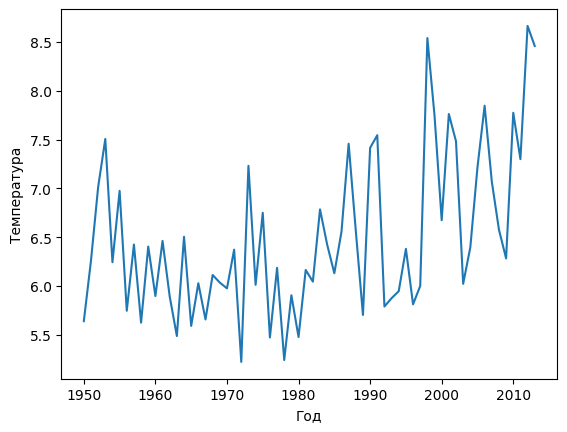

In [91]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_task.loc[df_task['City'] == 'Toronto'].groupby(df_task['dt'].dt.year).mean()['AverageTemperature'].plot()
plt.xlabel('Год')
plt.ylabel('Температура')
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [92]:
df_task.groupby("City").var().AverageTemperature.idxmax()

'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

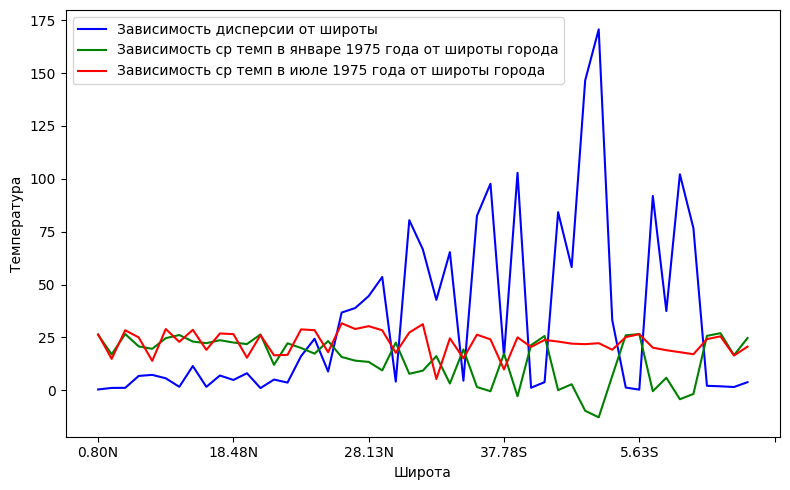

In [115]:
fig, ax = plt.subplots(figsize=(8, 5))

lat_var = df_task.groupby("Latitude").var()
jan1975_mean = df_task.loc[((df_task['dt'].dt.year == 1975) & (df_task['dt'].dt.month == 1))].groupby("Latitude").mean()
july1975_mean = df_task.loc[((df_task['dt'].dt.year == 1975) & (df_task['dt'].dt.month == 7))].groupby("Latitude").mean()


lat_var.plot(y='AverageTemperature', ax=ax, label="Зависимость дисперсии от широты", color='blue')
jan1975_mean.plot(y='AverageTemperature', ax=ax, label="Зависимость ср темп в январе 1975 года от широты города", color='green')
july1975_mean.plot(y='AverageTemperature', ax=ax, label="Зависимость ср темп в июле 1975 года от широты города", color='red')


plt.xlabel('Широта')
plt.ylabel('Температура')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

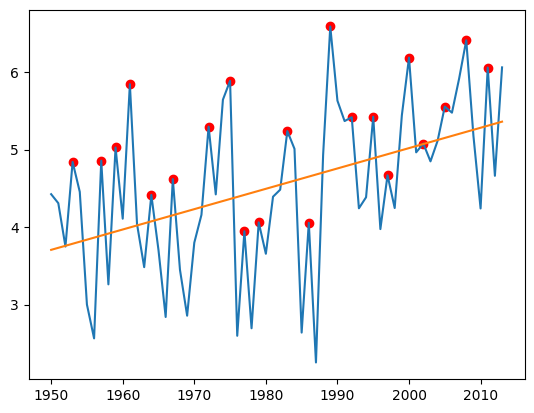

In [80]:
from sklearn.linear_model import LinearRegression

df_spb = df_task.loc[df_task["City"] == 'Saint Petersburg']

df_spb_year = pd.DataFrame(df_spb.groupby(df_spb['dt'].dt.year).mean()['AverageTemperature'])

df_spb_dot = df_spb_year.loc[((df_spb_year['AverageTemperature'] > df_spb_year['AverageTemperature'].shift(1)) & (df_spb_year['AverageTemperature'] > df_spb_year['AverageTemperature'].shift(-1)))]


regr = LinearRegression().fit(df_spb_year.index.to_numpy().reshape(-1, 1), df_spb_year['AverageTemperature'].to_numpy())

plt.plot(df_spb_year.index, df_spb_year['AverageTemperature'])
plt.scatter(df_spb_dot.index, df_spb_dot['AverageTemperature'], color='red')
plt.plot(df_spb_year.index, regr.predict(df_spb_year.index.to_numpy().reshape(-1, 1)))

plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [119]:
df_task_year = df_task.groupby([df_task["City"], df_task['dt'].dt.year]).mean()

print("1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна: ")
print((df_task_year.groupby("City").max() - df_task_year.groupby("City").min())['AverageTemperature'].idxmax())

df_task_month = df_task.groupby([df_task["City"], df_task['dt'].dt.month]).mean()
print(df_task_month)
print("2. Самая большая средняя разница между средней температурой января и средней температурой июля: ")
print((df_task.groupby("City").max() - df_task.groupby("City").min())['AverageTemperature'].idxmax())

print("3. Наибольшее среднее количество месяцев с отрицательной температурой в году. ")
print((df_task_year.groupby("City").max() - df_task_year.groupby("City").min())['AverageTemperature'].idxmax())



1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна: 
Mashhad
            AverageTemperature  AverageTemperatureUncertainty
City    dt                                                   
Abidjan 1            26.984078                       0.361625
        2            28.236313                       0.356734
        3            28.402578                       0.339422
        4            27.878688                       0.304047
        5            27.126672                       0.275141
...                        ...                            ...
Xian    8            23.230578                       0.393766
        9            17.837857                       0.361730
        10           11.955302                       0.304619
        11            5.362698                       0.352714
        12           -0.536317                       0.430016

[1200 rows x 2 columns]
2. Самая большая средняя разница между средней температур

TypeError: unsupported operand type(s) for -: 'str' and 'str'

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*